In [2]:
1+10

11

### Problem 01 - Crime Clusering
Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

#### 1. Importing the Necessary libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import DBSCAN
from sklearn import metrics

#### 2. Importing data 

In [8]:
data_1 = pd.read_csv('EastWestAirlines.csv')
data_1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


#### 3. Data understanding

In [9]:
data_1.shape

(3999, 12)

In [10]:
data_1.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [11]:
data_1.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [12]:
data_1.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [36]:
data_1['Qual_miles'].value_counts(ascending=False)

0       3773
1000      17
500       15
967        4
888        4
        ... 
1115       1
1604       1
2975       1
588        1
1199       1
Name: Qual_miles, Length: 100, dtype: int64

In [23]:
data_1['Award?'].value_counts()

0    2518
1    1481
Name: Award?, dtype: int64

#### 4. Data Processing

In [49]:
mm_scaler= preprocessing.MinMaxScaler()

In [50]:
data_1_us_cat = data_1[['cc1_miles','cc2_miles','cc3_miles','Award?']]
data_1_us = data_1[['Balance','Qual_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll']]

In [51]:
data_2 = mm_scaler.fit_transform(data_1_us)
data_2 = pd.DataFrame(data_2, columns=data_1_us.columns)
data_2.head()

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.164211,0.302326,0.067398,0.075472,0.835905


In [52]:
data_2 = pd.concat([data_2,data_1_us_cat],axis=1)
data_2.head()

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cc1_miles,cc2_miles,cc3_miles,Award?
0,0.016508,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,1,1,1,0
1,0.011288,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,1,1,1,0
2,0.024257,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,1,1,1,0
3,0.008667,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,1,1,1,0
4,0.057338,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,4,1,1,1


In [53]:
data_2 = data_2.drop(labels='Qual_miles', axis=1)
data_2.head()

,Balance,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cc1_miles,cc2_miles,cc3_miles,Award?
0,0.016508,0.000660,0.011628,0.000000,0.000000,0.843742,1,1,1,0
1,0.011288,0.000815,0.023256,0.000000,0.000000,0.839884,1,1,1,0
2,0.024257,0.015636,0.046512,0.000000,0.000000,0.847842,1,1,1,0
3,0.008667,0.001896,0.011628,0.000000,0.000000,0.837955,1,1,1,0
4,0.057338,0.164211,0.302326,0.067398,0.075472,0.835905,4,1,1,1


#### 5. Model Building

#### A. Hierarchical Clustering

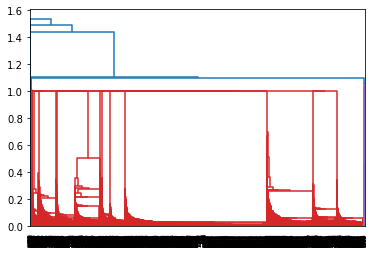

In [54]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(data_2, method='single'))

##### B. Kmean Clustering

###### a. Elbow curve method

In [71]:
wcss = []
for i in range(2,11):
    KM = KMeans(n_clusters=i,random_state=12)
    KM.fit(data_2)
    wcss.append(KM.inertia_)

In [72]:
wcss

[2496.6358504720656,
 1802.536952119513,
 1329.338600073999,
 1115.157062237115,
 922.4623299415887,
 790.9427805338747,
 664.24862419037,
 556.4976746809004,
 476.7832134547842]

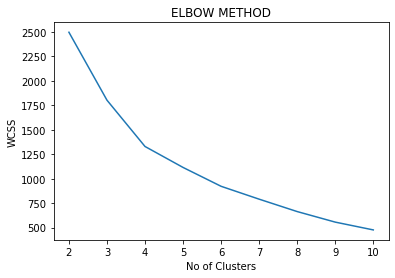

In [73]:
plt.plot(range(2,11),wcss)
plt.title('ELBOW METHOD')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

###### b. Silhouette score

In [74]:
Silhouette_score = []
for i in range(2,11):
    KM = KMeans(n_clusters=i,random_state=12)
    KM.fit_predict(data_2)
    score = silhouette_score(data_2,labels=KM.labels_, metric='euclidean')
    Silhouette_score.append(score)

In [75]:
Silhouette_score

[0.6506070822157172,
 0.5508853917399833,
 0.5242062439896172,
 0.5599050759696693,
 0.5692365977571705,
 0.5905465058094059,
 0.6271234897613777,
 0.6354231046576284,
 0.5535349205877316]

###### c. Calinski harabasz score

In [76]:
ch_score = []
for i in range(2,11):
    KM = KMeans(n_clusters=i,random_state=12)
    KM.fit_predict(data_2)
    score = calinski_harabasz_score(data_2,labels=KM.labels_)
    ch_score.append(score)

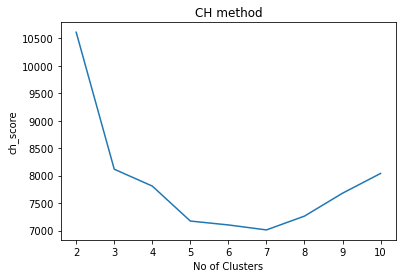

In [77]:
plt.plot(range(2,11),ch_score)
plt.title('CH method')
plt.xlabel('No of Clusters')
plt.ylabel('ch_score')
plt.show()

In [78]:
# spike is observed at clusters = 4

In [79]:
KM = KMeans(n_clusters=4,random_state=12)
label = KM.fit_predict(data_2)
label

array([1, 1, 1, ..., 0, 1, 1])

In [80]:
Clusters=pd.DataFrame(KM.fit_predict(data_2),columns=['Clusters'])
Clusters.head()

,Clusters
0,1
1,1
2,1
3,1
4,2


In [82]:
data_2['clusters'] = Clusters
data_KM = data_2
data_KM.head()

,Balance,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cc1_miles,cc2_miles,cc3_miles,Award?,clusters
0,0.016508,0.000660,0.011628,0.000000,0.000000,0.843742,1,1,1,0,1
1,0.011288,0.000815,0.023256,0.000000,0.000000,0.839884,1,1,1,0,1
2,0.024257,0.015636,0.046512,0.000000,0.000000,0.847842,1,1,1,0,1
3,0.008667,0.001896,0.011628,0.000000,0.000000,0.837955,1,1,1,0,1
4,0.057338,0.164211,0.302326,0.067398,0.075472,0.835905,4,1,1,1,2


In [84]:
data_KM[data_KM['clusters']==0].head()

,Balance,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cc1_miles,cc2_miles,cc3_miles,Award?,clusters
6,0.049808,0.104223,0.290698,0.000000,0.000000,0.843019,3,1,1,0,0
8,0.259850,0.006648,0.500000,0.124931,0.226415,0.837473,3,2,1,1,0
9,0.061507,0.107803,0.325581,0.037317,0.056604,0.835423,3,1,1,1,0
18,0.053655,0.103942,0.197674,0.000000,0.000000,0.832047,3,1,1,1,0
19,0.013699,0.039619,0.058140,0.000000,0.000000,0.831203,3,1,1,1,0


In [85]:
data_KM[data_KM['clusters']==1].head()

,Balance,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cc1_miles,cc2_miles,cc3_miles,Award?,clusters
0,0.016508,0.000660,0.011628,0.0,0.0,0.843742,1,1,1,0,1
1,0.011288,0.000815,0.023256,0.0,0.0,0.839884,1,1,1,0,1
2,0.024257,0.015636,0.046512,0.0,0.0,0.847842,1,1,1,0,1
3,0.008667,0.001896,0.011628,0.0,0.0,0.837955,1,1,1,0,1
5,0.009631,0.000000,0.000000,0.0,0.0,0.836749,1,1,1,0,1


In [86]:
data_KM[data_KM['clusters']==2].head()

,Balance,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cc1_miles,cc2_miles,cc3_miles,Award?,clusters
4,0.057338,0.164211,0.302326,0.067398,0.075472,0.835905,4,1,1,1,2
11,0.056617,0.231735,0.220930,0.000000,0.000000,0.834579,5,1,1,1,2
15,0.016714,0.187504,0.174419,0.000000,0.000000,0.833132,4,1,1,1,2
16,0.030437,0.185687,0.186047,0.000000,0.000000,0.832891,4,1,1,1,2
20,0.070726,0.223111,0.267442,0.008112,0.037736,0.831203,5,1,1,1,2


In [92]:
data_KM[data_KM['clusters']==3].head()

,Balance,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cc1_miles,cc2_miles,cc3_miles,Award?,clusters
7,0.012233,0.019910,0.046512,0.008112,0.018868,0.836267,1,1,1,1,3
17,0.008187,0.016273,0.058140,0.000000,0.000000,0.832288,1,1,1,1,3
21,0.108914,0.050439,0.186047,0.058409,0.169811,0.831203,1,1,1,1,3
29,0.011274,0.017654,0.093023,0.016225,0.018868,0.951772,1,1,1,1,3
36,0.013604,0.002465,0.046512,0.017847,0.056604,0.947552,1,1,1,1,3


In [94]:
data_2.shape

(3999, 11)

In [96]:
filtered_label0 = data_2[label == 0]
filtered_label1 = data_2[label == 1]
filtered_label2 = data_2[label == 2]
filtered_label3 = data_2[label == 3]
filtered_label0.shape,filtered_label1.shape,filtered_label3.shape,filtered_label3.shape

((613, 11), (1900, 11), (673, 11), (673, 11))

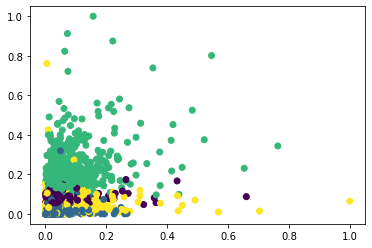

In [139]:
plt.scatter(data_2['Balance'] , data_2['Bonus_miles'], c=label)

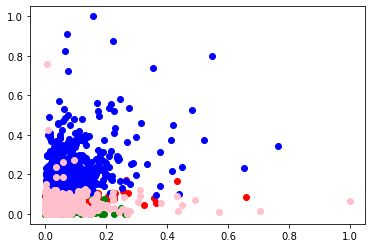

In [101]:
plt.scatter(filtered_label0['Balance'] , filtered_label0['Bonus_miles'], color = 'red')
plt.scatter(filtered_label1['Balance'] , filtered_label1['Bonus_miles'], color = 'green')
plt.scatter(filtered_label2['Balance'] , filtered_label2['Bonus_miles'], color = 'blue')
plt.scatter(filtered_label3['Balance'] , filtered_label3['Bonus_miles'], color = 'pink')
plt.show()

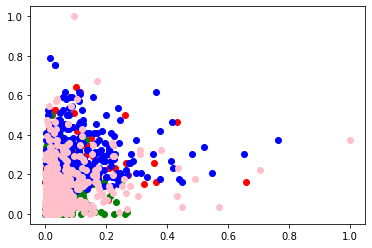

In [102]:
plt.scatter(filtered_label0['Balance'] , filtered_label0['Bonus_trans'], color = 'red')
plt.scatter(filtered_label1['Balance'] , filtered_label1['Bonus_trans'], color = 'green')
plt.scatter(filtered_label2['Balance'] , filtered_label2['Bonus_trans'], color = 'blue')
plt.scatter(filtered_label3['Balance'] , filtered_label3['Bonus_trans'], color = 'pink')
plt.show()

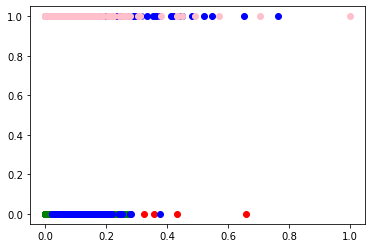

In [103]:
plt.scatter(filtered_label0['Balance'] , filtered_label0['Award?'], color = 'red')
plt.scatter(filtered_label1['Balance'] , filtered_label1['Award?'], color = 'green')
plt.scatter(filtered_label2['Balance'] , filtered_label2['Award?'], color = 'blue')
plt.scatter(filtered_label3['Balance'] , filtered_label3['Award?'], color = 'pink')
plt.show()

##### c. DBSCAN

In [80]:
# we know that no cluster equal to 4 for this data set
#lets check for DBSCAN

In [200]:
db = DBSCAN(eps=0.4, min_samples=180).fit(data_2)

In [201]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
labels

array([0, 0, 0, ..., 4, 0, 0], dtype=int64)

In [202]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data_2, labels))

Estimated number of clusters: 6
Estimated number of noise points: 641
Silhouette Coefficient: 0.592


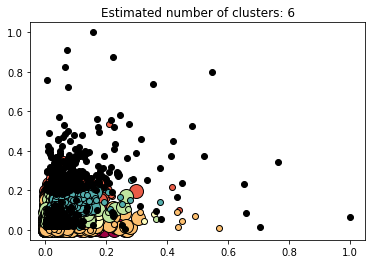

In [203]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = data_2[class_member_mask & core_samples_mask]
    plt.plot(
        xy['Balance'],
        xy['Bonus_miles'],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = data_2[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy['Balance'],
        xy['Bonus_miles'],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()